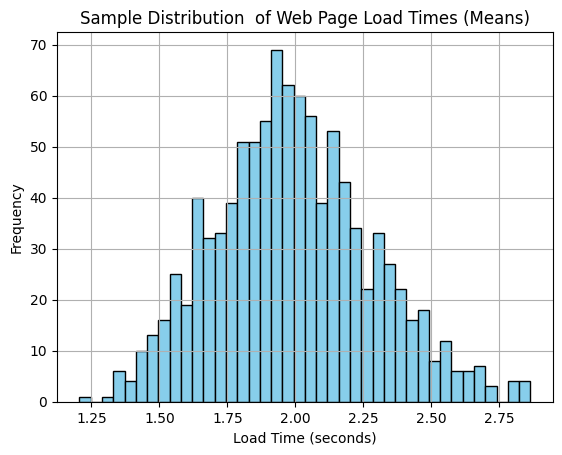

In [9]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(0)

population = np.random.exponential(scale=2.0, size=1000)

# Parameters 
sample_size = 50 
num_samples = 1000
samples_means = []

for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    samples_means.append(np.mean(sample))
    
# Plot the sampples of means
plt.hist(samples_means, bins=40, color='skyblue', edgecolor='black')
plt.title('Sample Distribution  of Web Page Load Times (Means)')
plt.xlabel('Load Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# From the above diagram we can see that the distribution of sample means approximates a normal distribution, demonstrating the Central Limit Theorem.
# And this holds true for large sample sizes even when the underlying population distribution is not normal.